In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
cleaned_data = pd.read_csv("Cleaned Data.csv",index_col = "Unnamed: 0")
cleaned_data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type,route
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi


In [5]:
cleaned_data.columns = ['price', 'airline_name', 'departure_city', 'arrival_city',
       'travel_date', 'duration', 'stops', 'cabin_class', 'booking_date',
       'days_until_travel', 'booking_type', 'travel_day_type', 'route']

In [7]:
cleaned_data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_day_type,route
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi


In [9]:
data = cleaned_data.copy()

In [11]:
data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_day_type,route
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi


## Data Exploration

In [14]:
data.head()

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_day_type,route
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai


In [16]:
data.shape

(3892, 13)

In [18]:
data.columns

Index(['price', 'airline_name', 'departure_city', 'arrival_city',
       'travel_date', 'duration', 'stops', 'cabin_class', 'booking_date',
       'days_until_travel', 'booking_type', 'travel_day_type', 'route'],
      dtype='object')

In [20]:
data["booking_date"] = pd.to_datetime(data["booking_date"])

In [22]:
data["travel_date"] = pd.to_datetime(data["travel_date"])

In [24]:
data.dtypes

price                       float64
airline_name                 object
departure_city               object
arrival_city                 object
travel_date          datetime64[ns]
duration                      int64
stops                        object
cabin_class                  object
booking_date         datetime64[ns]
days_until_travel             int64
booking_type                 object
travel_day_type              object
route                        object
dtype: object

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3892 entries, 0 to 3891
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              3892 non-null   float64       
 1   airline_name       3892 non-null   object        
 2   departure_city     3892 non-null   object        
 3   arrival_city       3892 non-null   object        
 4   travel_date        3892 non-null   datetime64[ns]
 5   duration           3892 non-null   int64         
 6   stops              3892 non-null   object        
 7   cabin_class        3892 non-null   object        
 8   booking_date       3892 non-null   datetime64[ns]
 9   days_until_travel  3892 non-null   int64         
 10  booking_type       3892 non-null   object        
 11  travel_day_type    3892 non-null   object        
 12  route              3892 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 

#### Categorical columns

In [29]:
cat_cols = data.select_dtypes(include = "object").columns
cat_cols

Index(['airline_name', 'departure_city', 'arrival_city', 'stops',
       'cabin_class', 'booking_type', 'travel_day_type', 'route'],
      dtype='object')

#### Numerical columns

In [32]:
num_cols = data.select_dtypes(include = "number").columns
num_cols

Index(['price', 'duration', 'days_until_travel'], dtype='object')

#### Unique Values in Each Columns 

In [35]:
for i in data[cat_cols]:
    print(f"No of Unique Values in {i} column is: ", data[i].unique())
    print()

No of Unique Values in airline_name column is:  ['Air India' 'IndiGo' 'Akasa Air' 'SpiceJet' 'Etihad Airways']

No of Unique Values in departure_city column is:  ['Delhi' 'Banglore' 'Chennai' 'Mumbai' 'Kolkata']

No of Unique Values in arrival_city column is:  ['Mumbai' 'Kolkata' 'Hyderabad' 'Goa' 'Banglore' 'Guwahathi']

No of Unique Values in stops column is:  ['Direct' '1 stop' '3 stops' '2 stops']

No of Unique Values in cabin_class column is:  ['Business' 'Economy' 'First' 'Premium Economy']

No of Unique Values in booking_type column is:  ['Moderate' 'Advanced' 'Last-minute']

No of Unique Values in travel_day_type column is:  ['Holiday' 'Weekday' 'Weekend']

No of Unique Values in route column is:  ['Delhi → Mumbai' 'Banglore → Kolkata' 'Chennai → Hyderabad'
 'Mumbai → Goa' 'Delhi → Banglore' 'Kolkata → Guwahathi']



In [37]:
for i in data[cat_cols]:
    print(f"No of Unique Values in {i} column is:", data[i].nunique())
    print()

No of Unique Values in airline_name column is: 5

No of Unique Values in departure_city column is: 5

No of Unique Values in arrival_city column is: 6

No of Unique Values in stops column is: 4

No of Unique Values in cabin_class column is: 4

No of Unique Values in booking_type column is: 3

No of Unique Values in travel_day_type column is: 3

No of Unique Values in route column is: 6



#### Summary Statistics 

In [40]:
data[num_cols].describe()

,price,duration,days_until_travel
count,3892.000000,3892.000000,3892.000000
mean,30434.573099,425.412384,24.342497
std,29713.645818,362.888379,18.421048
min,2682.000000,70.000000,2.000000
25%,10554.100000,155.000000,9.000000
50%,19105.110000,345.000000,19.000000
75%,40541.565000,525.000000,41.000000
max,291560.990000,1750.000000,55.000000


In [42]:
data[cat_cols].describe()

,airline_name,departure_city,arrival_city,stops,cabin_class,booking_type,travel_day_type,route
count,3892,3892,3892,3892,3892,3892,3892,3892
unique,5,5,6,4,4,3,3,6
top,Air India,Delhi,Hyderabad,1 stop,Premium Economy,Moderate,Weekend,Chennai → Hyderabad
freq,3148,1167,740,2168,1358,1727,1345,740


#### Value Counts

In [45]:
for i in data[cat_cols].columns:
    print(f"Count of Each Value in {i} column is:", data[i].value_counts())
    print()

Count of Each Value in airline_name column is: airline_name
Air India         3148
IndiGo             637
Akasa Air           55
SpiceJet            30
Etihad Airways      22
Name: count, dtype: int64

Count of Each Value in departure_city column is: departure_city
Delhi       1167
Chennai      740
Mumbai       733
Banglore     699
Kolkata      553
Name: count, dtype: int64

Count of Each Value in arrival_city column is: arrival_city
Hyderabad    740
Goa          733
Kolkata      699
Banglore     636
Guwahathi    553
Mumbai       531
Name: count, dtype: int64

Count of Each Value in stops column is: stops
1 stop     2168
Direct     1701
2 stops      22
3 stops       1
Name: count, dtype: int64

Count of Each Value in cabin_class column is: cabin_class
Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: count, dtype: int64

Count of Each Value in booking_type column is: booking_type
Moderate       1727
Advanced       1266
Last-minute    

## Univariate Analysis

#### Price Analysis

In [49]:
data["price"].describe()

count      3892.000000
mean      30434.573099
std       29713.645818
min        2682.000000
25%       10554.100000
50%       19105.110000
75%       40541.565000
max      291560.990000
Name: price, dtype: float64

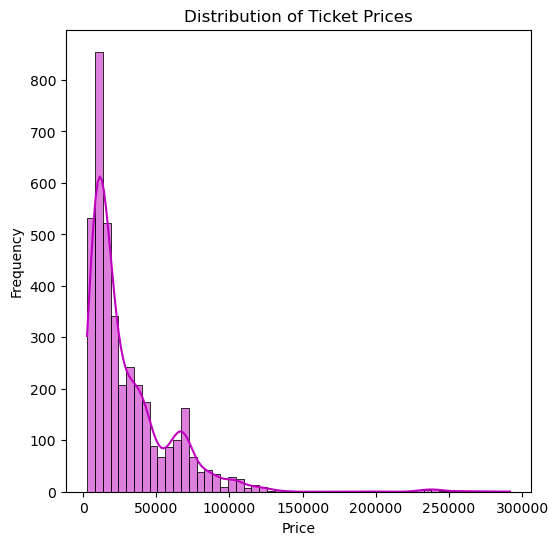

In [55]:
plt.figure(figsize = (6,6))
sns.histplot(data = data,
             x = "price",
             bins = 54,
             kde = True,
            color= 'm')

plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Detecting Outliers

In [58]:
Q1 = np.quantile(data["price"],0.25)
Q2 =  np.quantile(data["price"],0.50)
Q3 = np.quantile(data["price"],0.75)

iqr = Q3 - Q1
print(f"iqr : {iqr}")

lower_whisker = Q1 - 1.5* iqr
upper_whisker = Q3 + 1.5* iqr

outliers = data[(data["price"] < lower_whisker) | (data["price"] > upper_whisker)]
len(outliers)

iqr : 29987.465000000004


180

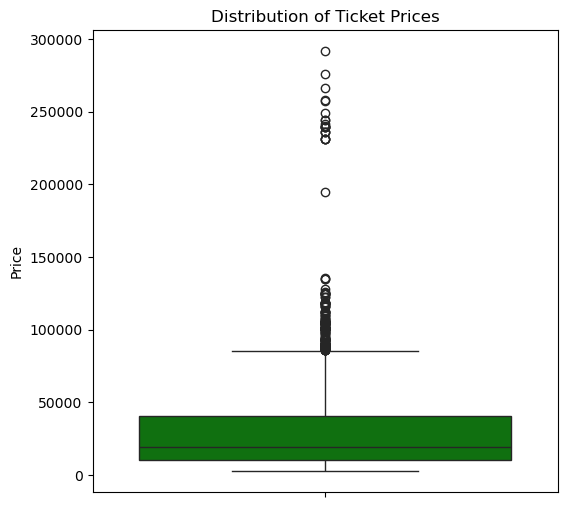

In [62]:
plt.figure(figsize = (6,6))
sns.boxplot(data = data,
               y = "price",
           color = 'g')
plt.title('Distribution of Ticket Prices')
plt.ylabel('Price')
plt.show()

+ Outliers exist but represent valid pricing, not errors accurately reflect real market conditions and also reprents a small portion (180 out of 3892 tickets, ~4.6%).
+ Most ticket prices are concentrated in the range of 10,000 to 40,000.
+ The dataset is positively skewed due to the presence of high-priced outliers.

#### No of Stops Analysis

In [25]:
stop_counts = data["stops"].value_counts()
stop_counts

stops
1 stop     2168
Direct     1701
2 stops      22
3 stops       1
Name: count, dtype: int64

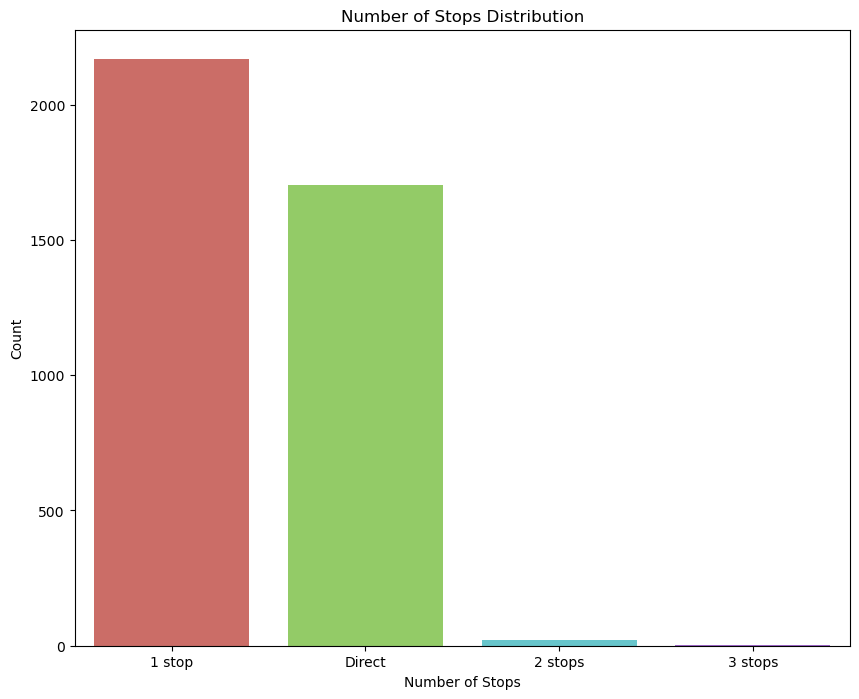

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(x=stop_counts.index, y=stop_counts.values,palette='hls')
plt.title('Number of Stops Distribution')
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.show()

#### Cabin Class Analysis

In [27]:
cabin_counts = data["cabin_class"].value_counts()
cabin_counts

cabin_class
Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: count, dtype: int64

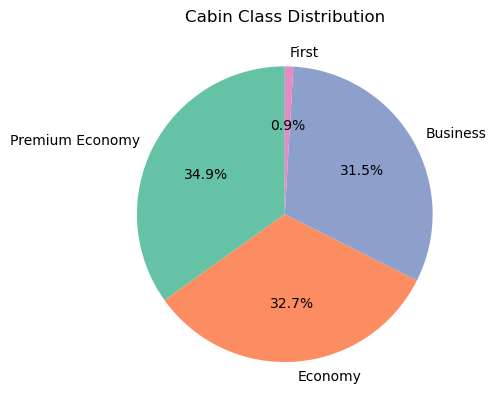

In [28]:
plt.pie(cabin_counts.values, labels=cabin_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set2.colors )
plt.title('Cabin Class Distribution')
plt.show()

## Bivariate Analysis

#### Price vs Booking Type

In [86]:
booking_type_stats = data.groupby('booking_type')['price'].describe()
booking_type_stats

,count,mean,std,min,25%,50%,75%,max
booking_type,,,,,,,,
Advanced,1266.0,24831.534297,21573.409999,2682.00,8178.5475,16206.00,38111.0,104723.00
Last-minute,899.0,39073.099956,36159.496798,5810.54,14752.2750,25450.00,51070.5,291560.99
Moderate,1727.0,30045.118251,30115.492508,3998.83,10483.3300,19498.71,39526.0,275896.07


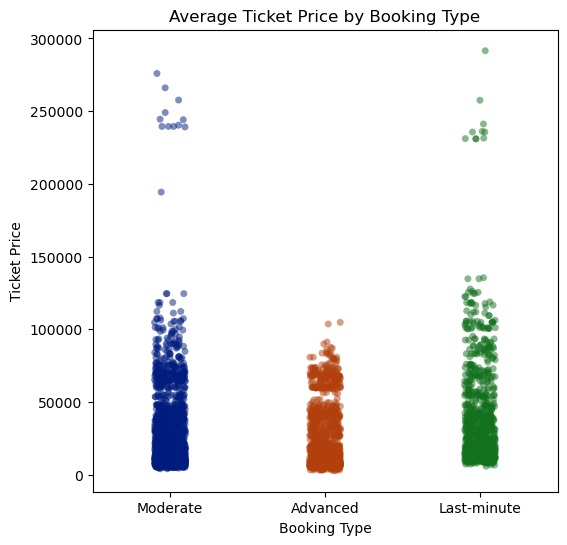

In [88]:
plt.figure(figsize=(6,6))
sns.stripplot(data=data, x='booking_type', y='price', jitter=True, palette="dark", alpha=0.5)
plt.title('Average Ticket Price by Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Ticket Price')
plt.show()


#### price vs travel type

In [90]:
travel_type_stats = data.groupby('travel_day_type')['price'].describe()
travel_type_stats

,count,mean,std,min,25%,50%,75%,max
travel_day_type,,,,,,,,
Holiday,1233.0,29580.987299,26869.082644,3592.77,11118.22,19533.000,39575.86,257611.94
Weekday,1314.0,31091.277314,30008.631022,3161.00,9962.88,18639.405,41980.75,275896.07
Weekend,1345.0,30575.511353,31834.481095,2682.00,10492.24,19343.220,40004.00,291560.99


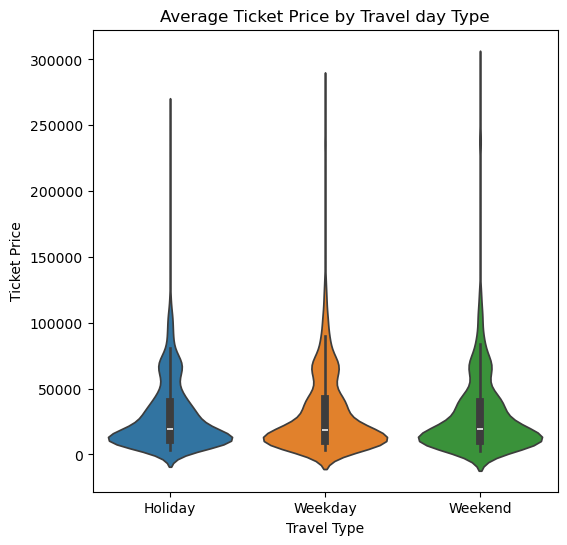

In [92]:
plt.figure(figsize=(6,6))
sns.violinplot(data=data, x='travel_day_type', y='price',palette="tab10")
plt.title('Average Ticket Price by Travel day Type')
plt.xlabel('Travel Type')
plt.ylabel('Ticket Price')
plt.show()

#### Ticket price vs Airline

In [103]:
average_price_by_airline = data.groupby('airline_name')['price'].median().sort_values()
average_price_df = average_price_by_airline.reset_index()

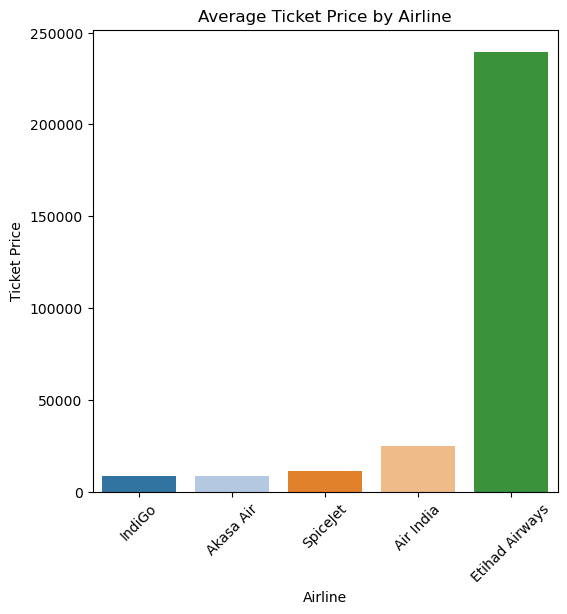

In [118]:
plt.figure(figsize=(6,6))
sns.barplot(data=average_price_df, x='airline_name', y='price',palette="tab20")
plt.title('Average Ticket Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Ticket Price')
plt.xticks(rotation=45) 
plt.yticks(fontsize=10)
plt.show()

#### Price vs days_to_travel

In [112]:
pivot_table = pd.pivot_table(data, values='price', index='days_until_travel', aggfunc='median')
pivot_table.columns = ['median_price']
pivot_table

,median_price
days_until_travel,
2,30990.00
3,21520.93
5,25615.97
6,23281.50
9,22740.04
16,19942.75
19,19996.18
20,18739.00
22,17201.50


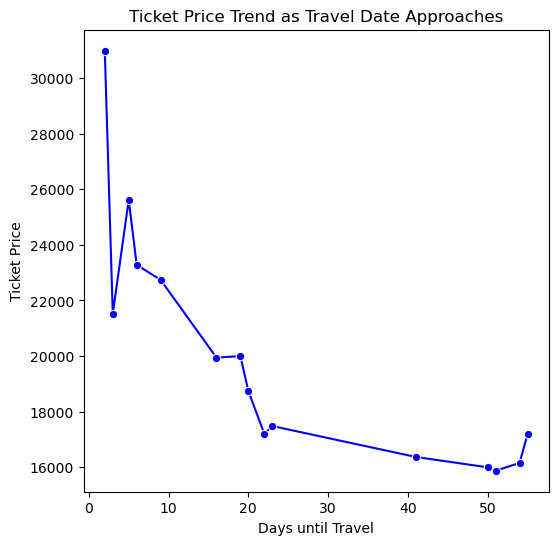

In [122]:
plt.figure(figsize=(6,6))
sns.lineplot(data=pivot_table, x=pivot_table.index, y='median_price', marker='o', color="b")
plt.title('Ticket Price Trend as Travel Date Approaches')
plt.xlabel('Days until Travel')
plt.ylabel('Ticket Price')
plt.show()

## price vs Route

In [124]:
pivot_table = pd.pivot_table(data, values='price', index='route', aggfunc='median')
pivot_table.columns = ['median_price']
a=pivot_table.reset_index()
a

,route,median_price
0,Banglore → Kolkata,26808.00
1,Chennai → Hyderabad,19483.00
2,Delhi → Banglore,16803.52
3,Delhi → Mumbai,11443.24
4,Kolkata → Guwahathi,19343.22
5,Mumbai → Goa,20556.41


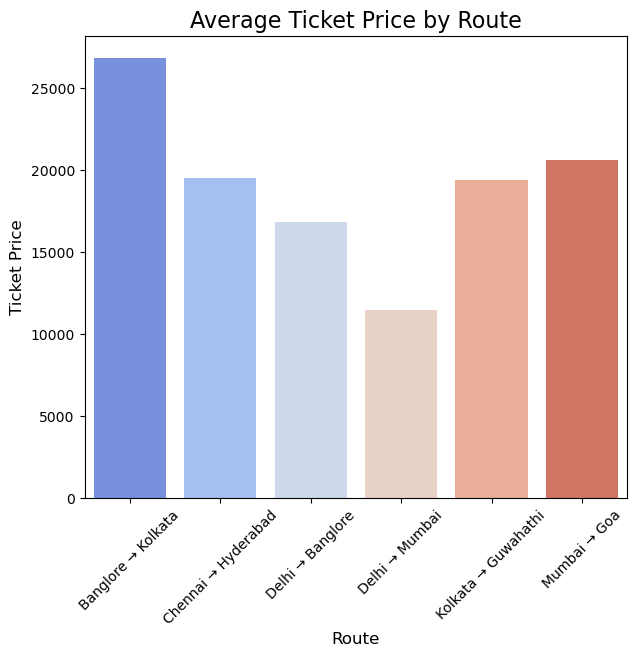

In [139]:
plt.figure(figsize=(7,6))
sns.barplot(data=a, x='route', y='median_price', palette="coolwarm")
plt.title('Average Ticket Price by Route', fontsize=16)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Ticket Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.show()

## price vs Cabin class

In [141]:
pivot_table = pd.pivot_table(data, values='price', index='cabin_class', aggfunc='median')
pivot_table.columns = ['median_price']
b=pivot_table.reset_index()
b

,cabin_class,median_price
0,Business,49612.36
1,Economy,8745.07
2,First,231294.41
3,Premium Economy,18046.50


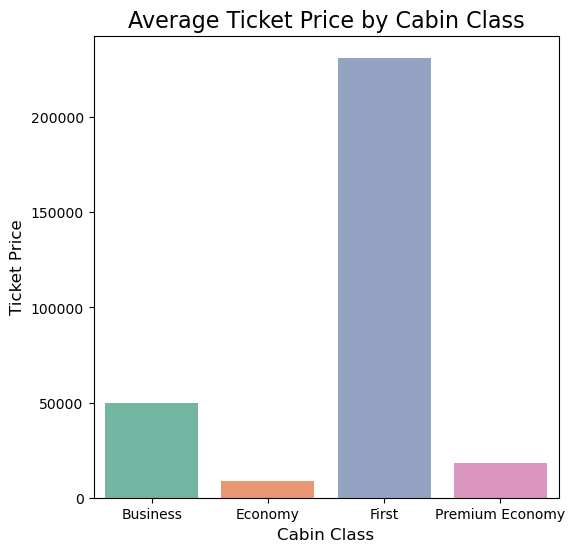

In [143]:
plt.figure(figsize=(6,6))
sns.barplot(data=b, x='cabin_class', y='median_price',palette="Set2")
plt.title('Average Ticket Price by Cabin Class', fontsize=16)
plt.xlabel('Cabin Class', fontsize=12)
plt.ylabel('Ticket Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Price vs Stops

In [154]:
pivot_table = pd.pivot_table(data, values='price', index='stops')
pivot_table

,price
stops,
1 stop,39690.182685
2 stops,28453.038636
3 stops,37415.330000
Direct,18659.412263


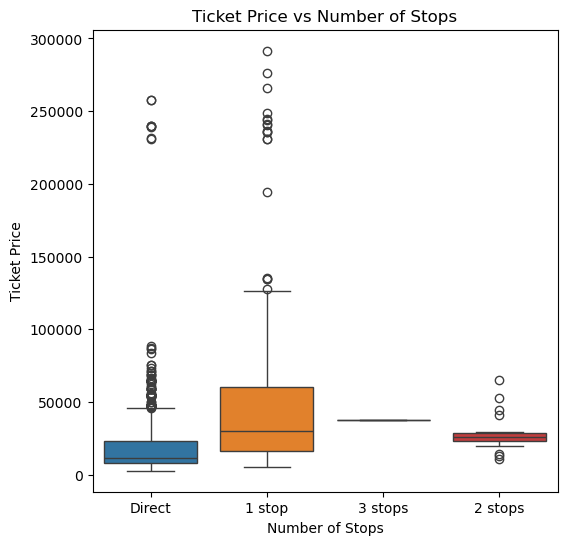

In [166]:
plt.figure(figsize=(6,6))
sns.boxplot(x='stops', y='price', data=data,palette="tab10")
plt.title('Ticket Price vs Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Ticket Price')
plt.show()

## Multivariate Analysis

## price vs cabin class and stops

In [170]:
price_analysis = data.groupby(['stops', 'cabin_class'])['price'].median().reset_index()
price_analysis

,stops,cabin_class,price
0,1 stop,Business,65202.170
1,1 stop,Economy,10329.530
2,1 stop,First,240750.675
3,1 stop,Premium Economy,20042.000
4,2 stops,Economy,14472.860
5,2 stops,Premium Economy,28082.000
6,3 stops,Economy,37415.330
7,Direct,Business,37329.150
8,Direct,Economy,8288.865
9,Direct,First,64158.950


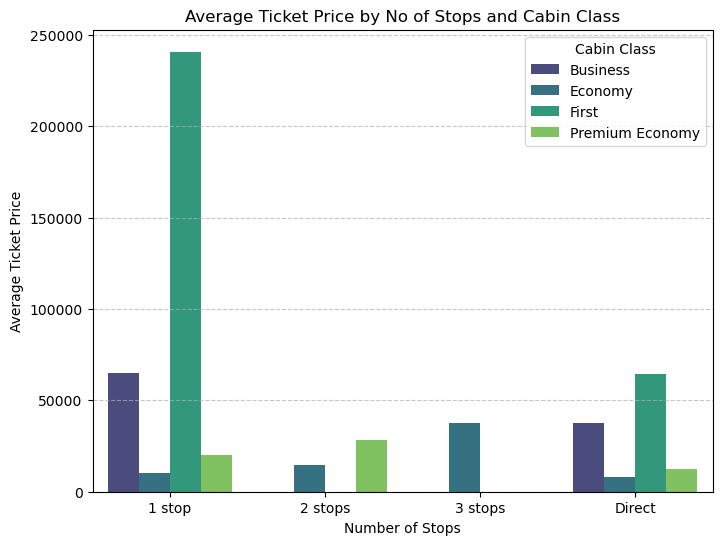

In [176]:
plt.figure(figsize=(8,6))
sns.barplot(data=price_analysis, x='stops', y='price', hue='cabin_class',palette="viridis")
plt.title('Average Ticket Price by No of Stops and Cabin Class')
plt.xlabel('Number of Stops')
plt.ylabel('Average Ticket Price')
plt.legend(title='Cabin Class')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price vs stops and travel_type

In [179]:
travel_stop_data = data.groupby(['travel_day_type', 'stops'])['price'].median().unstack()
travel_stop_data

stops,1 stop,2 stops,3 stops,Direct
travel_day_type,,,,
Holiday,26344.5,27099.0,37415.33,11794.48
Weekday,31128.0,28193.5,NaN,11315.30
Weekend,30652.0,24743.0,NaN,11639.56


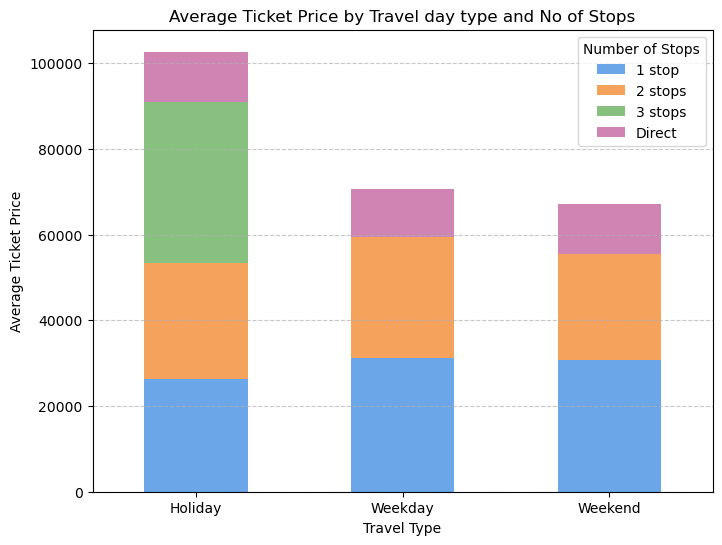

In [187]:
travel_stop_data.plot(kind='bar', stacked=True, figsize=(8, 6),color=['#6AA6E8', '#F5A25D', '#88C080', '#D084B4'])
plt.title('Average Ticket Price by Travel day type and No of Stops')
plt.xlabel('Travel Type')
plt.ylabel('Average Ticket Price')
plt.legend(title='Number of Stops')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price vs route and booking_type

In [190]:
route_booking_pivot = data.pivot_table(
    values='price', 
    index='route', 
    columns='booking_type', 
    aggfunc='median'
)
route_booking_pivot

booking_type,Advanced,Last-minute,Moderate
route,,,
Banglore → Kolkata,20101.00,42954.00,26834.000
Chennai → Hyderabad,17195.00,24612.50,18856.000
Delhi → Banglore,11709.65,17142.44,19105.110
Delhi → Mumbai,7228.12,15534.44,10831.125
Kolkata → Guwahathi,17059.00,40287.00,16935.425
Mumbai → Goa,15814.00,25670.00,22911.000


<Figure size 1500x800 with 0 Axes>

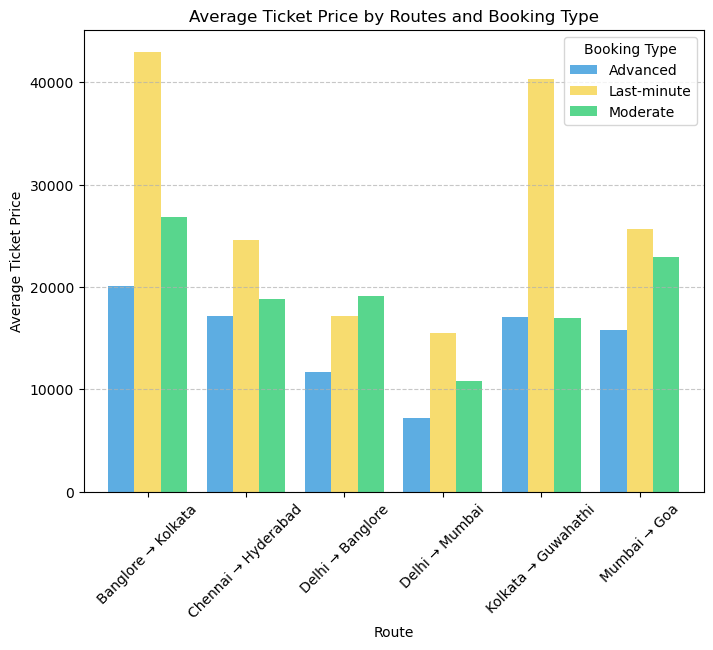

In [194]:
plt.figure(figsize=(15, 8))
route_booking_pivot.plot(kind='bar', figsize=(8,6), width=0.8,color=['#5DADE2', '#F7DC6F', '#58D68D', '#AF7AC5'])
plt.title('Average Ticket Price by Routes and Booking Type')
plt.xlabel('Route')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.legend(title='Booking Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price vs cabin class and route

In [197]:
pivot_table = data.pivot_table(
    values='price', 
    index='route', 
    columns='cabin_class', 
    aggfunc='median'
)
pivot_table

cabin_class,Business,Economy,First,Premium Economy
route,,,,
Banglore → Kolkata,68119.00,7818.460,NaN,21777.000
Chennai → Hyderabad,46086.00,6553.635,NaN,17904.500
Delhi → Banglore,39550.04,10691.440,NaN,13623.145
Delhi → Mumbai,34988.54,8735.280,231294.41,11043.595
Kolkata → Guwahathi,72190.59,9610.880,NaN,28082.000
Mumbai → Goa,67922.90,9710.000,NaN,21267.500


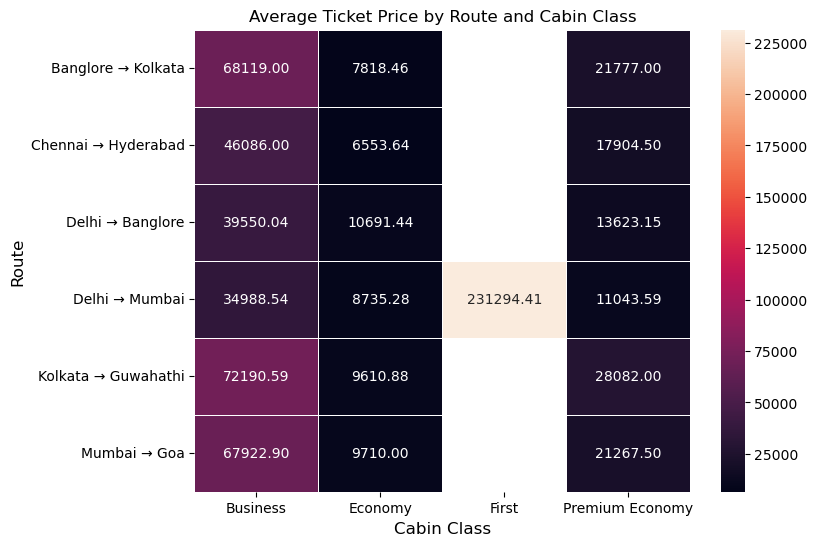

In [235]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', linewidths=0.5,cmap=sns.color_palette("rocket", as_cmap=True))
plt.title('Average Ticket Price by Route and Cabin Class')
plt.xlabel('Cabin Class', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Ticket price vs booking_type and travel type

In [238]:
pivot_table = data.pivot_table(
    values='price', 
    index='booking_type', 
    columns='travel_day_type', 
    aggfunc='median'
)
pivot_table

travel_day_type,Holiday,Weekday,Weekend
booking_type,,,
Advanced,16366.0,15879.00,16480.000
Last-minute,NaN,26951.97,24810.675
Moderate,20921.5,17479.00,19743.500


<Figure size 800x600 with 0 Axes>

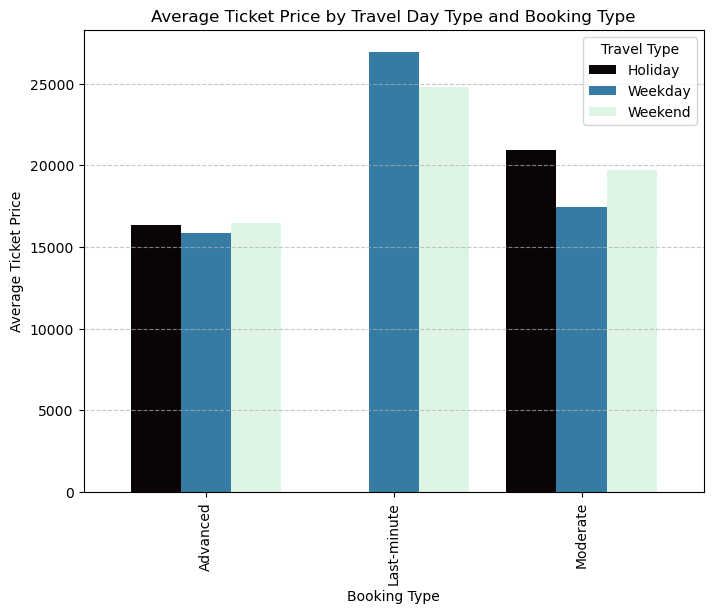

In [246]:
plt.figure(figsize=(8,6))
pivot_table.plot(kind='bar', figsize=(8,6), width=0.8,colormap='mako')
plt.title('Average Ticket Price by Travel Day Type and Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Average Ticket Price')
plt.yticks(fontsize=10)
plt.legend(title='Travel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Correlation

In [249]:
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix

,price,duration,days_until_travel
price,1.000000,0.358968,-0.164010
duration,0.358968,1.000000,-0.025208
days_until_travel,-0.164010,-0.025208,1.000000


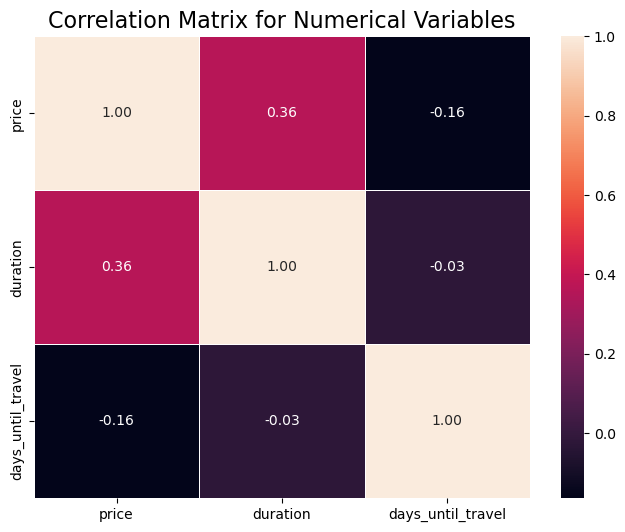

In [251]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

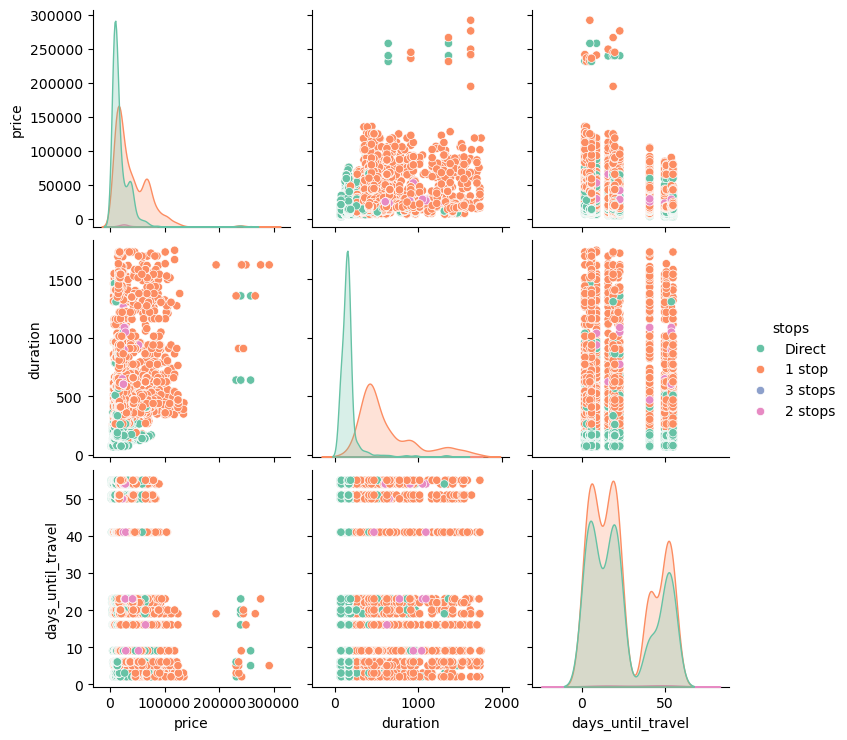

In [249]:
sns.pairplot(
    data=data,
    vars=['price', 'duration', 'days_until_travel'],
    hue='stops',  
    diag_kind='kde')
plt.show()